In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
data = pd.read_csv("/content/winequality-white.csv",sep = ";")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
Data_X = data.iloc[:,:-1]
Data_Y = data['quality']

In [8]:
sc = StandardScaler()
Data_X = sc.fit_transform(Data_X)

In [9]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Data_X, Data_Y, test_size = 0.1)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, Ytrain)
pred_lr = lr.predict(Xtest)
lr_rmse = (mean_squared_error(Ytest, pred_lr))**0.5
lr_score = r2_score(Ytest, pred_lr)
cv_lr = cross_val_score(estimator = lr, X = Xtrain, y = Ytrain, cv = 10)

print('Linear Regression:')
print('R2 Score:', lr_score)
print('Room Mean Squared Error:', lr_rmse)
print('Cross Validation', cv_lr.mean())

Linear Regression:
R2 Score: 0.30628248057298657
Room Mean Squared Error: 0.7103332416057824
Cross Validation 0.2685931542738306


In [11]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain, Ytrain)

pred_dt = dt.predict(Xtest)
dt_rmse = (mean_squared_error(Ytest, pred_dt))**0.5
dt_score = r2_score(Ytest, pred_dt)
cv_dt = cross_val_score(estimator = dt, X = Xtrain, y = Ytrain, cv = 10)

print('Decision Tree:')
print('R2 Score:', dt_score)
print('Room Mean Squared Error:', dt_rmse)
print('Cross Validation', cv_dt.mean())

Decision Tree:
R2 Score: 0.04882154882154888
Room Mean Squared Error: 0.831767235886265
Cross Validation 0.11350164094651156


In [12]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', gamma = 'scale')
svr.fit(Xtrain, Ytrain)

pred_svr = svr.predict(Xtest)
svr_rmse = (mean_squared_error(Ytest, pred_svr))**0.5
cv_svr = cross_val_score(estimator = svr, X = Xtrain, y = Ytrain, cv = 10)
svr_score = r2_score(Ytest, pred_svr)

print('Support Vector Machine:\n')
print('R2 Score:', svr_score)
print('Room Mean Squared Error:', svr_rmse)
print('Cross Validation', cv_svr.mean())

Support Vector Machine:

R2 Score: 0.4214326435624337
Room Mean Squared Error: 0.6487057850677018
Cross Validation 0.3976876123615034


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 60)
rf.fit(Xtrain, Ytrain)

pred_rf = rf.predict(Xtest)
rf_rmse = (mean_squared_error(Ytest, pred_rf))**0.5
rf_score = r2_score(Ytest, pred_rf)
cv_rf = cross_val_score(estimator = rf, X = Xtrain, y = Ytrain, cv = 10)

print('Random Forest:\n')
print('R2 Score:', rf_score)
print('Room Mean Squared Error:', rf_rmse)
print('Cross Validation', cv_rf.mean())

Random Forest:

R2 Score: 0.562424398304028
Room Mean Squared Error: 0.5641535911225039
Cross Validation 0.523599258536006


In [14]:
model = ['Linear Regression', 'Decision Tree','Random Forest', 'Support Vector']
scores = [lr_score, dt_score, rf_score, svr_score]
rmse = [lr_rmse, dt_rmse, rf_rmse, svr_rmse, ]
crv = [cv_lr.mean(), cv_dt.mean(),  cv_rf.mean(), cv_svr.mean()]

In [15]:
res_dict = {
    'Model':model,
    'R2_Score': scores, 
    'RMSE': rmse, 
    'Cross Validation': crv
}
Result = pd.DataFrame(res_dict)
Result

,Model,R2_Score,RMSE,Cross Validation
0,Linear Regression,0.306282,0.710333,0.268593
1,Decision Tree,0.048822,0.831767,0.113502
2,Random Forest,0.562424,0.564154,0.523599
3,Support Vector,0.421433,0.648706,0.397688


Text(0, 0.5, 'CV Score')

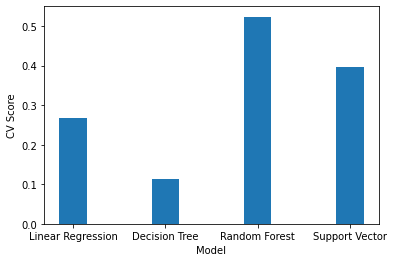

In [17]:
#Plot cross validation score

plt.bar(model, crv, width = 0.3)
plt.xlabel('Model')
plt.ylabel('CV Score')